<a href="https://colab.research.google.com/github/NitishaSham/TV-Marketing---Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/tvmarketing.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


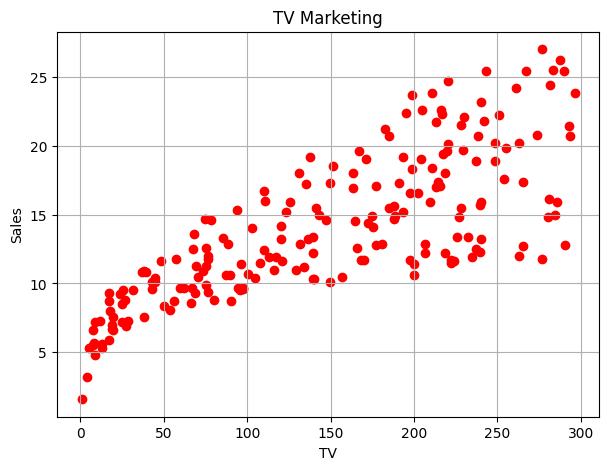

In [8]:
plt.figure(figsize=(7,5))
plt.scatter(df['TV'],df['Sales'], color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid()
plt.title("TV Marketing")
plt.show()

In [9]:
x = df['TV']
y = df['Sales']
print(x.shape,y.shape)

(200,) (200,)


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(140, 1) (60, 1) (140, 1) (60, 1)


In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
print(lr.intercept_)     # intercept - c
print(lr.coef_)          # coefficient - m

[7.23945983]
[[0.0464078]]


In [22]:
slope = lr.coef_[0]
intercept = lr.intercept_[0]

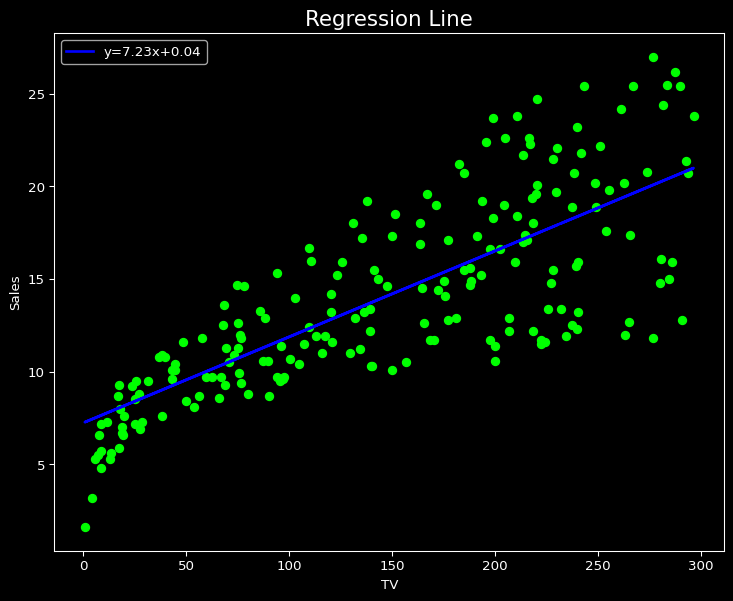

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(9,7), dpi=96)
plt.title("Regression Line", fontsize=16)
plt.scatter(df['TV'],df['Sales'], color='lime')
plt.plot(df['TV'],slope*df['TV']+intercept, color='blue', linewidth=2, label='y=7.23x+0.04')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [24]:
y_pred=lr.predict(x_test)
y_pred[:5]

array([[14.81785392],
       [16.30754437],
       [20.83230507],
       [ 7.78243112],
       [17.46309864]])

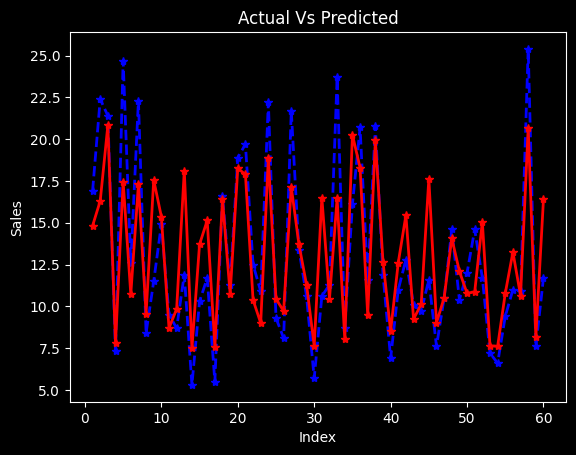

In [25]:
x_axis = [i for i in range(1,61)]
plt.plot(x_axis,y_test, color="blue", linewidth=2, linestyle="--", marker="*")
plt.plot(x_axis,y_pred, color="red",  linewidth=2, linestyle="-",marker="*")
plt.title('Actual Vs Predicted')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 8.970991242413614
r_square_value : 0.6714477229302764


In [27]:
pred = lr.predict([[1000]])
pred

array([[53.64726196]])